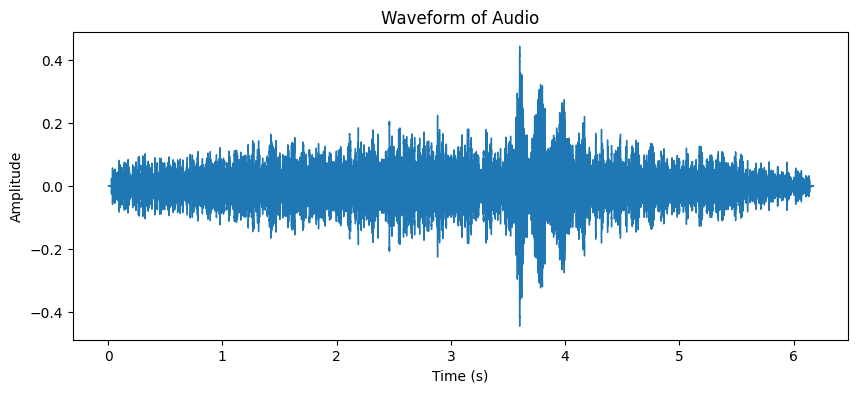

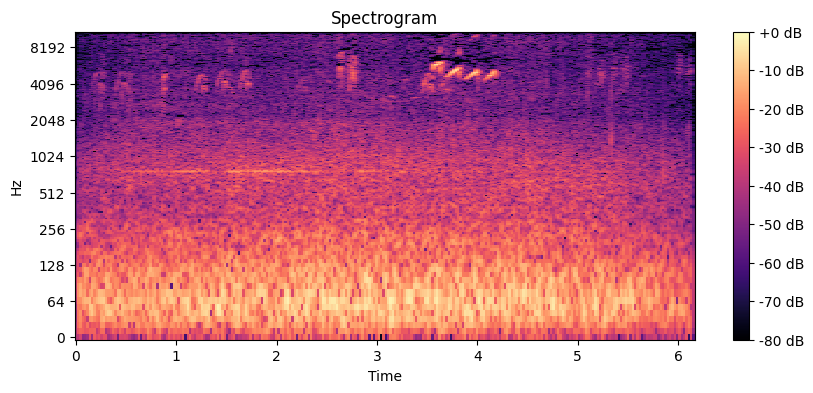

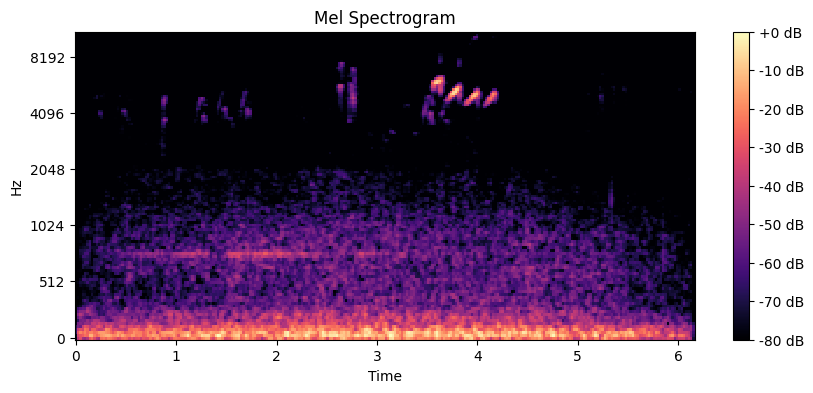

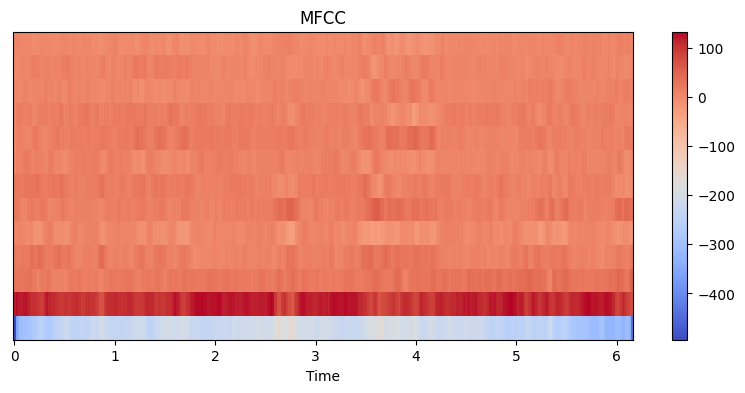

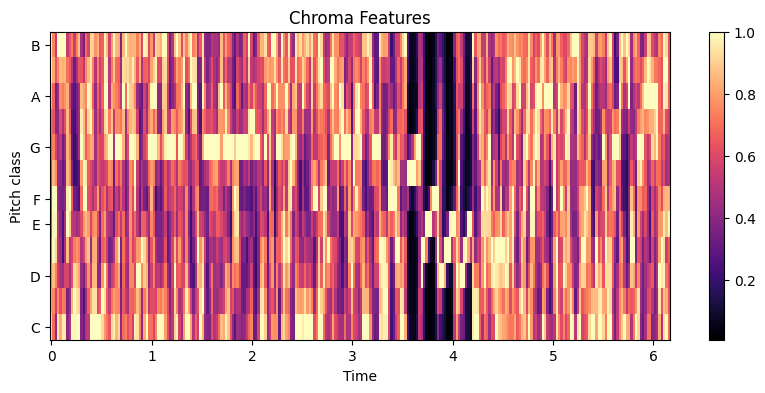

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file (update path accordingly)
audio_path = "train_audio/comsan/XC113844.ogg"
y, sr = librosa.load(audio_path, sr=22050)

# Display the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# 1️⃣ Spectrogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram")
plt.show()

# 2️⃣ Mel Spectrogram
plt.figure(figsize=(10, 4))
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_dB = librosa.amplitude_to_db(M, ref=np.max)
librosa.display.specshow(M_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.show()

# 3️⃣ MFCC
plt.figure(figsize=(10, 4))
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title("MFCC")
plt.show()

# 4️⃣ Chroma Features
plt.figure(figsize=(10, 4))
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title("Chroma Features")
plt.show()


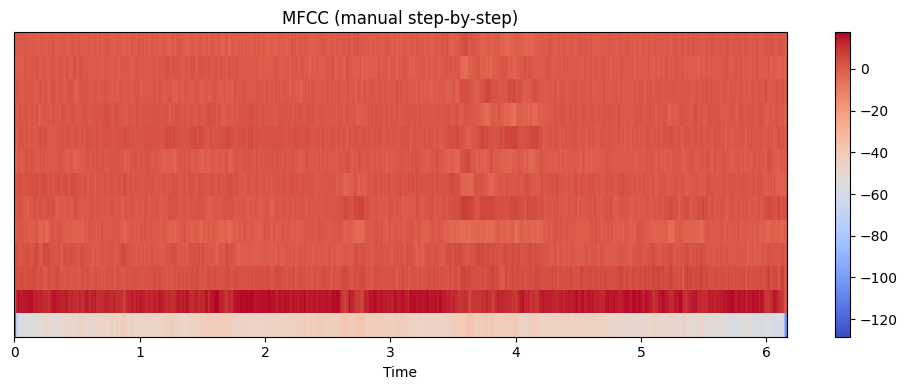

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Load audio
y, sr = librosa.load('train_audio/comsan/XC113844.ogg', sr=22050)

# Step 1: Frame the audio (default parameters simulate 10ms frames with ~50% overlap)
frame_length = int(0.025 * sr)  # ~25ms
hop_length = int(0.010 * sr)    # ~10ms (50% overlap for 20ms frame)

# Step 2: Apply STFT to each frame
stft = np.abs(librosa.stft(y, n_fft=frame_length, hop_length=hop_length))

# Step 3: Apply mel filterbank to convert to mel scale
mel_filter = librosa.filters.mel(sr=sr, n_fft=frame_length, n_mels=40)
mel_spectrum = np.dot(mel_filter, stft**2)  # Power spectrum

# Step 4: Take log of the mel spectrum
log_mel_spectrum = np.log(mel_spectrum + 1e-9)  # Avoid log(0)

# Step 5: Apply DCT to get MFCCs
mfcc = scipy.fftpack.dct(log_mel_spectrum, axis=0, type=2, norm='ortho')[0:13, :]

# Plot the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sr, hop_length=hop_length)
plt.colorbar()
plt.title('MFCC (manual step-by-step)')
plt.tight_layout()
plt.show()


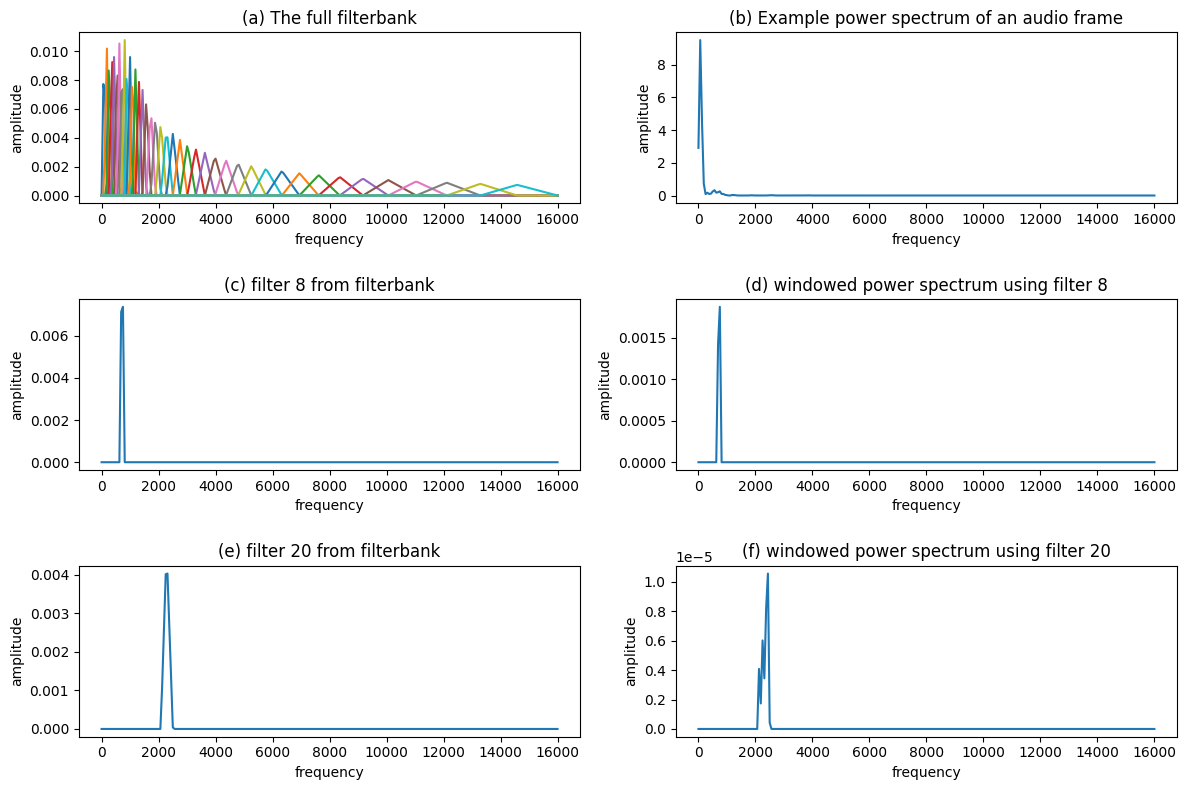

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# === Load your audio file ===
# Replace 'bird_audio.wav' with your actual file path
file_path = 'train_audio/comsan/XC113844.ogg'
y, sr = librosa.load(file_path, sr=None)

# === STFT and Power Spectrum ===
n_fft = 512
hop_length = 256
D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))**2

# === Mel Filter Bank ===
n_mels = 40
mel_basis = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

# === Frequencies for plotting ===
frequencies = np.linspace(0, sr / 2, int(1 + n_fft // 2))

# === Choose one frame from the power spectrum ===
frame_index = 10
power_spectrum = D[:, frame_index]

# === Plotting ===
plt.figure(figsize=(12, 8))

# (a) Full Mel filterbank
plt.subplot(3, 2, 1)
for i in range(n_mels):
    plt.plot(frequencies, mel_basis[i])
plt.title('(a) The full filterbank')
plt.xlabel('frequency')
plt.ylabel('amplitude')

# (b) Example power spectrum of an audio frame
plt.subplot(3, 2, 2)
plt.plot(frequencies, power_spectrum)
plt.title('(b) Example power spectrum of an audio frame')
plt.xlabel('frequency')
plt.ylabel('amplitude')

# (c) Filter 8
plt.subplot(3, 2, 3)
plt.plot(frequencies, mel_basis[7])
plt.title('(c) filter 8 from filterbank')
plt.xlabel('frequency')
plt.ylabel('amplitude')

# (d) Windowed power spectrum using filter 8
plt.subplot(3, 2, 4)
plt.plot(frequencies, mel_basis[7] * power_spectrum)
plt.title('(d) windowed power spectrum using filter 8')
plt.xlabel('frequency')
plt.ylabel('amplitude')

# (e) Filter 20
plt.subplot(3, 2, 5)
plt.plot(frequencies, mel_basis[19])
plt.title('(e) filter 20 from filterbank')
plt.xlabel('frequency')
plt.ylabel('amplitude')

# (f) Windowed power spectrum using filter 20
plt.subplot(3, 2, 6)
plt.plot(frequencies, mel_basis[19] * power_spectrum)
plt.title('(f) windowed power spectrum using filter 20')
plt.xlabel('frequency')
plt.ylabel('amplitude')

plt.tight_layout()
plt.show()
